In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/second_start_extended_combined_may19.feather")
data = data.reset_index(drop=True)
# data["BiasedEnergy"] = data["TotalE"] + 0.2*data["AMH_4H"]
data["BiasedEnergy"] = data["Lipid"] + data["Rg"] + data["Membrane"] + data["AMH-Go"] + 0.2*data["AMH_4H"]
data["BiasEnergy"] = 0.02 * (data["BiasTo"] - data["DisReal"])**2
data["Energy_with_all_bias"] = data["BiasEnergy"] + data["BiasedEnergy"]

In [3]:
data.columns

Index(['level_0', 'AMH', 'AMH-Go', 'AMH_3H', 'AMH_4H', 'BiasTo', 'DisReal',
       'Dis_h56', 'Distance', 'Energy', 'Lipid', 'Lipid1', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'Lipid2',
       'Lipid3', 'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9',
       'Membrane', 'Qw', 'Rg', 'Run', 'Step', 'Temp', 'TempT', 'TotalE',
       'abs_z_average', 'index', 'rg1', 'rg2', 'rg3', 'rg4', 'rg5', 'rg6',
       'rg_all', 'z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5', 'z_h6',
       'BiasedEnergy', 'BiasEnergy', 'Energy_with_all_bias'],
      dtype='object')

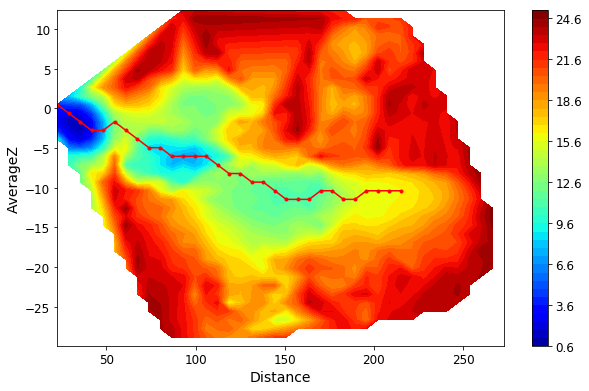

In [4]:
pre = "/Users/weilu/Research/server/aug_2018/01_week/freeEnergy"
temp = 370
location = pre + "/combined/_280-350/2d_zAverage_dis/force_0.1/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(28,0),save=False, plot1d=0, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

# pre transition state

(40, 80)

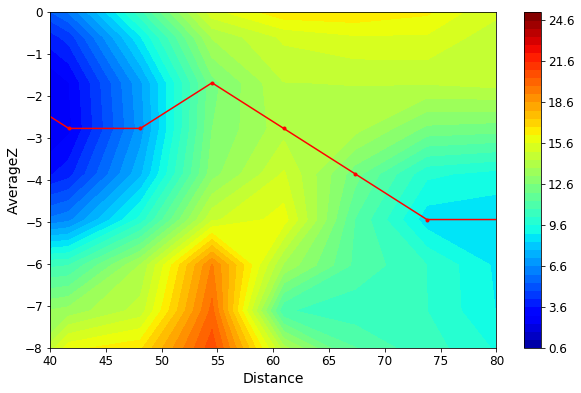

In [15]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-8, 0)
plt.xlim(40, 80)
# plt.clim(0, 20)
# plt.colorbar()

In [5]:
t_pos = data.query("TempT == 373 and DisReal > 52 and DisReal < 57 and z_average > -4 and z_average < 0").reset_index(drop=True)
chosen = t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)
# chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/aug21/low_e_jun01_pre.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a405598d0>]], dtype=object)

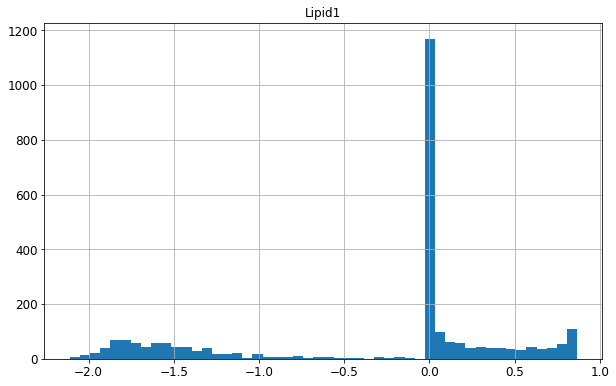

In [18]:
t_pos.hist("Lipid1",bins=50)

# at transition state

(40, 80)

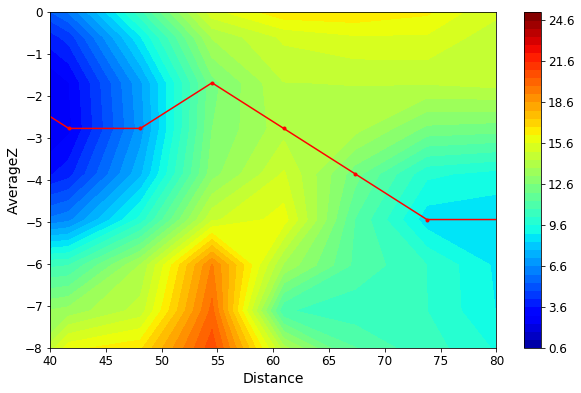

In [20]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-8, 0)
plt.xlim(40, 80)
# plt.clim(0, 20)
# plt.colorbar()

In [51]:
t_pos = data.query("TempT == 373 and DisReal > 57 and DisReal <63 and z_average > -5 and z_average < -2").reset_index(drop=True)
chosen = t_pos.query("Lipid1 < -0.5 and Lipid10 < -0.5").sort_values("Energy_with_all_bias").head(n=10)
# chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_jun01_transition.csv")

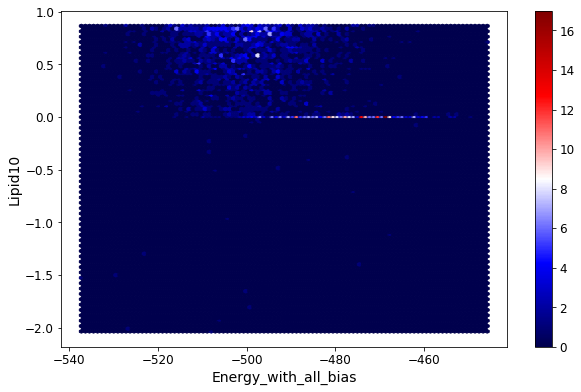

In [50]:
t_pos.query("Lipid1 < -0.5").plot.hexbin("Energy_with_all_bias", "Lipid10", cmap="seismic", sharex=False)

In [41]:
chosen["Lipid10"]

1809   -1.539335
1810   -1.492583
101    -2.004417
1824   -1.290158
114    -2.036322
715    -0.507082
106    -1.930354
1823   -0.967124
113    -1.639273
1825   -1.801742
42     -0.722760
43     -1.407829
41     -1.119277
Name: Lipid10, dtype: float64

In [29]:
t_pos.query("Lipid1 < -0.5 and Lipid6 < -0.5").sort_values("Energy_with_all_bias").head(n=20)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
1809,307888,-195.630242,-435.155569,-256.611899,-309.100543,64.0,58.183612,19.117130,53.955815,-736.440977,...,-3.372721,-1.120181,-6.685898,-4.955295,-10.356982,-8.509524,-4.613997,-537.957084,0.676607,-537.280477
852,222680,-212.492575,-426.742858,-280.660929,-322.856403,66.0,61.794507,23.979250,-48.982575,-698.168487,...,-2.493581,-3.412816,-9.158446,-5.865533,-7.015594,-1.613935,-2.160496,-527.957597,0.353723,-527.603873
2184,418784,-202.883003,-426.597887,-268.332371,-314.045236,70.0,58.645122,26.143309,53.643294,-755.443350,...,-2.323231,-2.429134,-6.090470,-6.003408,-8.892851,-5.687133,-4.399457,-529.470401,2.578665,-526.891736
101,26825,-199.648358,-425.305810,-273.748964,-333.705235,76.0,62.819403,47.702800,53.283447,-723.012908,...,-4.260705,0.139279,-6.230079,-6.442975,-10.699556,-6.137595,-16.491721,-530.114741,3.474563,-526.640178
94,26038,-208.510674,-430.119814,-276.016418,-320.356026,76.0,59.524977,24.224513,58.393343,-728.250229,...,-2.747517,-1.340868,-5.378715,-5.859207,-7.833290,-7.282965,-4.424369,-532.032658,5.428528,-526.604131
979,224932,-200.999176,-424.964917,-268.205085,-314.214457,66.0,61.513355,25.585336,15.120150,-757.444224,...,-2.930676,0.095223,-6.989153,-9.343414,-8.763971,-4.947870,-5.669710,-526.520846,0.402600,-526.118246
855,222692,-212.117022,-428.949862,-274.930920,-315.779656,66.0,58.304995,25.048162,-50.516437,-696.965462,...,-2.739929,-0.467787,-8.357556,-5.537234,-9.871371,-5.828420,-4.298823,-527.272362,1.184262,-526.088100
54,23504,-203.173196,-427.494189,-269.880197,-315.403807,76.0,62.247608,12.586580,30.725986,-730.314199,...,-4.241929,-5.544556,-9.178300,-7.867663,-8.649030,-6.375447,-4.008420,-529.720337,3.782566,-525.937772
2715,580048,-208.429187,-424.416328,-273.843307,-318.042329,66.0,59.913774,25.402670,-20.440483,-707.163751,...,-2.957331,-2.383170,-7.417953,-9.693094,-6.990099,-3.684163,-4.300805,-526.572130,0.740843,-525.831287
831,222424,-208.500164,-420.544978,-274.221226,-318.412940,66.0,61.444471,18.582937,-30.424102,-764.721182,...,-2.475907,-2.184501,-9.018082,-6.716107,-9.031155,-4.425669,-5.255468,-526.152329,0.415057,-525.737272


# post trainsition

(40, 80)

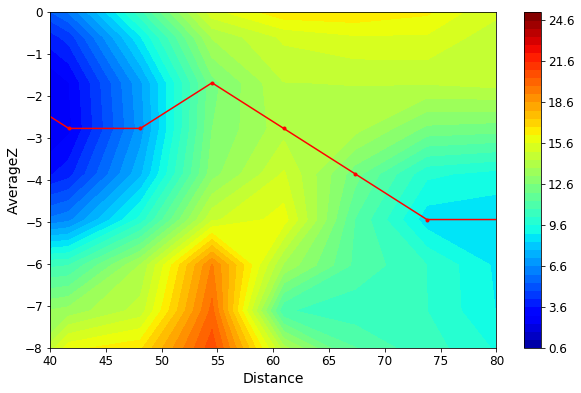

In [52]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-8, 0)
plt.xlim(40, 80)
# plt.clim(0, 20)
# plt.colorbar()

In [54]:
t_pos = data.query("TempT == 373 and DisReal > 63 and DisReal <72 and z_average > -6 and z_average < -3").reset_index(drop=True)
chosen = t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)
# chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_jun01_post_transition.csv")

In [55]:
chosen

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
4010,446101,-211.480423,-442.463754,-286.204801,-345.759750,80.0,66.936457,50.557520,-64.268538,-733.547034,...,-4.976259,-1.394228,-6.643697,-4.078782,-9.780926,-9.066586,-15.639029,-550.266247,3.413123,-546.853124
2839,388904,-221.503388,-436.726296,-291.605144,-345.176318,76.0,65.741900,45.936472,-55.943603,-741.000204,...,-5.869313,-2.672310,-6.559123,-6.108043,-10.470321,-8.651620,-19.190212,-544.426074,2.104572,-542.321502
4015,446133,-213.112447,-439.145305,-289.273137,-347.660227,80.0,67.062016,57.472450,-47.939616,-738.877963,...,-5.763330,-3.748541,-8.568946,-3.402772,-11.275554,-8.917268,-18.321435,-544.521828,3.347829,-541.173999
4013,446125,-209.451212,-436.911669,-285.341764,-342.279061,80.0,69.031551,52.115058,-46.543365,-708.575044,...,-4.951642,-0.677398,-7.152916,-5.391908,-11.183478,-9.321433,-16.967458,-540.502155,2.406137,-538.096018
505,26769,-212.502047,-432.283242,-284.108653,-345.343903,76.0,69.887765,63.889698,60.153880,-762.170015,...,-4.411739,-1.505991,-6.577402,-3.687029,-10.050159,-10.331140,-15.308807,-537.751250,0.747188,-537.004061
569,28377,-211.101138,-428.622490,-285.091278,-342.449126,76.0,68.912845,45.648562,-10.651692,-707.005817,...,-5.963440,-1.719226,-7.853797,-6.875862,-10.784236,-7.533348,-18.696292,-537.018407,1.004555,-536.013852
239,22277,-202.186215,-430.985317,-277.861108,-338.611440,76.0,69.594168,46.242939,-52.808616,-740.588945,...,-5.500809,-2.048178,-6.209699,-3.764542,-10.130583,-9.405525,-19.748512,-535.671116,0.820694,-534.850423
4014,446129,-207.600808,-433.650512,-284.874895,-343.534088,80.0,66.615807,54.887784,-44.059781,-745.538545,...,-5.800334,-2.747858,-9.419299,-4.241098,-12.719748,-9.414943,-16.538970,-537.048270,3.582732,-533.465538
568,28365,-207.214669,-428.678001,-279.481647,-337.742500,76.0,70.805104,50.827103,2.186179,-729.899974,...,-3.491304,0.333993,-5.603651,-1.682577,-9.441809,-8.717918,-16.279346,-533.237648,0.539739,-532.697909
3637,416993,-213.974771,-432.285433,-283.488804,-325.225638,70.0,68.413256,20.869282,65.738819,-735.073151,...,-4.355289,-2.938984,-10.520999,-10.438956,-7.884285,-1.999664,-4.131186,-532.317022,0.050355,-532.266667


# 5-6 out region
## zoom to 50 - 130

(50, 120)

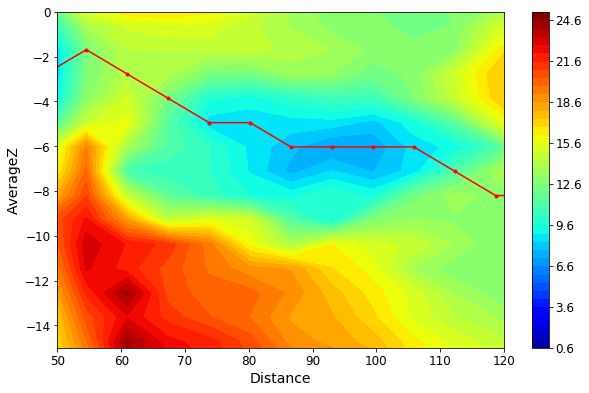

In [5]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-15, 0)
plt.xlim(50, 120)
# plt.clim(0, 20)
# plt.colorbar()

# The unwanted path 1

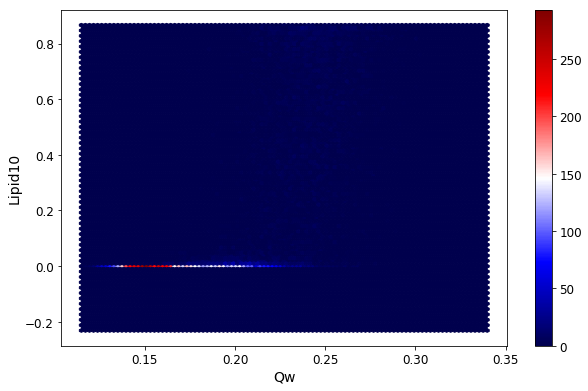

In [45]:
t = data.query("TempT == 373 and DisReal < 100 and Lipid1 < -0.3 and Lipid15 < -0.3 and DisReal > 50 and Lipid10 > -0.25")
t.plot.hexbin("Qw", "Lipid10", cmap="seismic", sharex=False)

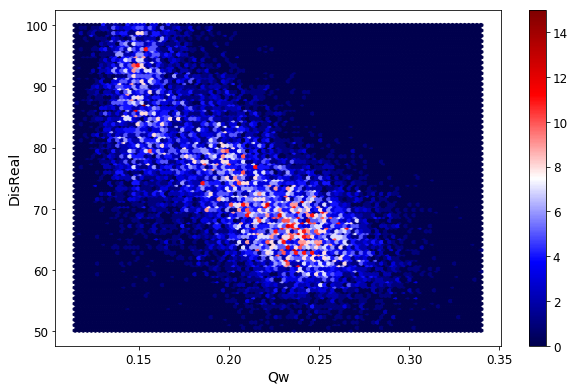

In [46]:
t.plot.hexbin("Qw", "DisReal", cmap="seismic", sharex=False)

In [58]:
t_pos = data.query("TempT == 373 and DisReal < 100 and Lipid1 < -0.3 and Lipid15 < -0.3 and DisReal > 50 and Lipid10 > -0.25")
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_path1.csv")

# unwanted path 2, helix 1 out

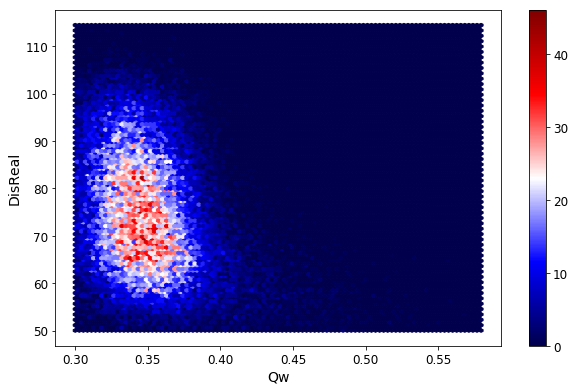

In [57]:
t = data.query("TempT == 373 and Lipid1 > -0.5 and Qw > 0.3 and DisReal > 50")
t.plot.hexbin("Qw", "DisReal", cmap="seismic", sharex=False)

In [59]:
t_pos = data.query("TempT == 373 and Lipid1 > -0.5 and Qw > 0.3 and DisReal > 50")
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_path2.csv")

In [ ]:
t_pos = data.query("TempT == 373 and DisReal > 80 and DisReal < 100 and z_average > -8 and z_average < -4").reset_index(drop=True)
t_pos.plot.hexbin("Energy_with_all_bias", "Lipid1", cmap="seismic", sharex=False)

In [193]:
t_pos = data.query("TempT == 373 and DisReal > 80 and DisReal < 100 and z_average > -8 and z_average < -4").reset_index(drop=True)
chosen = t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)
chosen.to_csv("/Users/weilu/Research/data/low_e_jun01_h56.csv")

In [197]:
t_pos.query("Lipid1 < -0.5").sort_values("Energy_with_all_bias").head(n=20)

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
7922,600066,-218.142307,-446.992027,-291.678962,-352.354453,94.0,93.045966,62.599341,-33.528161,-739.972991,...,-7.928949,-3.226523,-9.011228,-6.757330,-14.131343,-14.803465,-21.232008,-548.922365,0.018204,-548.904161
7921,600062,-212.394362,-443.980428,-286.857215,-349.705965,94.0,89.735826,62.417495,-38.614652,-761.752478,...,-6.611168,-2.650674,-6.301858,-6.033335,-9.673215,-10.093627,-20.069953,-544.805595,0.363664,-544.441931
9008,653790,-214.252021,-436.923250,-285.205326,-345.318451,92.0,82.772092,58.521394,69.845324,-737.297739,...,-4.478611,0.097867,-6.508623,-4.419184,-9.199424,-6.788752,-17.728036,-545.132696,1.703086,-543.429611
2077,240410,-220.312986,-437.590957,-290.558738,-346.437659,94.0,94.635741,65.483675,38.657025,-733.150749,...,-6.246558,-0.183788,-6.445593,-4.796985,-9.924937,-17.313959,-19.361403,-543.242774,0.008083,-543.234691
1049,28461,-210.956131,-441.325110,-279.734301,-341.120978,76.0,80.201087,62.110460,-32.345150,-746.558349,...,-7.025193,-3.172057,-7.528709,-4.070789,-9.033173,-12.842535,-25.990765,-543.154244,0.352983,-542.801261
2854,270713,-211.361449,-437.038069,-287.883144,-345.241391,98.0,97.091568,71.533853,-96.869755,-772.208512,...,-6.390107,-2.693870,-6.815748,-4.249246,-9.322100,-16.711451,-17.488690,-542.273375,0.016505,-542.256870
6716,446065,-212.398077,-440.203450,-284.330981,-344.442563,80.0,83.013829,67.293783,-82.875897,-711.944040,...,-5.828299,-1.815328,-5.904521,-4.346957,-10.804010,-6.916591,-20.667553,-541.813732,0.181663,-541.632068
6690,445885,-208.093119,-436.829162,-286.090277,-344.267325,80.0,81.883750,63.799134,-69.686281,-726.046091,...,-6.148379,-0.260000,-4.974692,-3.671368,-10.373978,-14.422206,-21.623450,-540.727587,0.070970,-540.656617
7776,563495,-208.908227,-437.178089,-282.820087,-343.123115,78.0,82.207193,69.044239,-80.949390,-753.426505,...,-5.874535,-1.388256,-6.618534,-3.846508,-8.456262,-12.426866,-21.845310,-540.876040,0.354010,-540.522030
8522,619536,-209.730173,-435.139497,-285.360462,-343.690619,104.0,96.789610,67.003272,95.343535,-735.130488,...,-6.596803,-1.326120,-7.209749,-4.823753,-8.103709,-19.455100,-21.162817,-540.816427,1.039794,-539.776632


## notice two caveats
1. At relative high temp(373), helix 6 is in the membrane half the time(energy term can pick out those I want)
2. helix 1 could be seperated from the rest 5 helix.(energy term cannot pick them out)

In [198]:
t_pos["chosen"] = (t_pos["Lipid1"] < -0.5) &(t_pos["z_h6"] < -10) & (t_pos["z_h3"] > -15)
a = t_pos["chosen"]
a.value_counts()

False    5743
True     4181
Name: chosen, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43ed3e80>]], dtype=object)

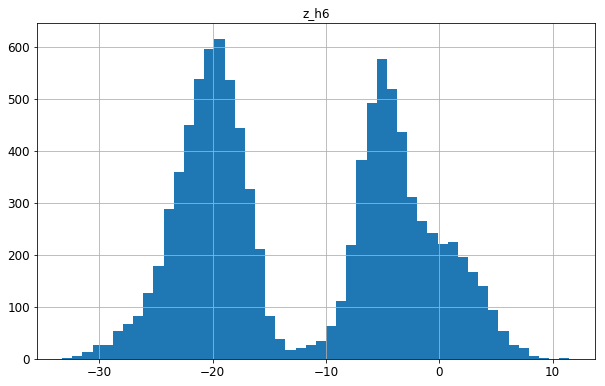

In [194]:
t_pos.hist("z_h6",bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43f49a20>]], dtype=object)

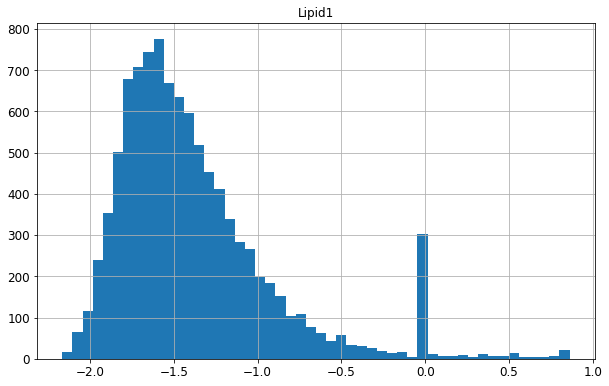

In [186]:
t_pos.hist("Lipid1",bins=50)

# 3-4 out region
## zoom to 120 - 200

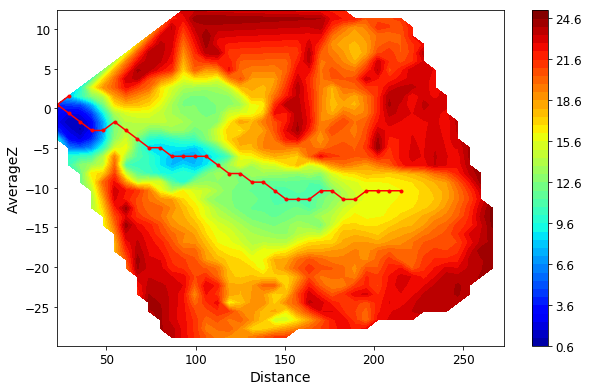

In [201]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
# plt.ylim(-15, 0)
# plt.xlim(50, 120)

(120, 200)

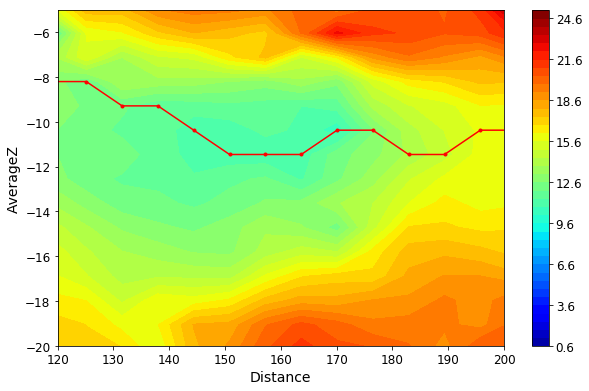

In [203]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/more_bins/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, start=(18, 30), end=(29,1),save=False, xlabel="Distance", ylabel="AverageZ", plot1d=False, zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-20, -5)
plt.xlim(120, 200)

In [25]:
t_pos = data.query("TempT == 373 and DisReal > 140 and DisReal < 180 and z_average > -14 and z_average < -8").reset_index(drop=True)
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.drop_duplicates(["Step", "Temp", "BiasTo"]).to_csv("/Users/weilu/Research/data/aug21/low_e_jun01_h34.csv")

# Next, additional state visible under high force

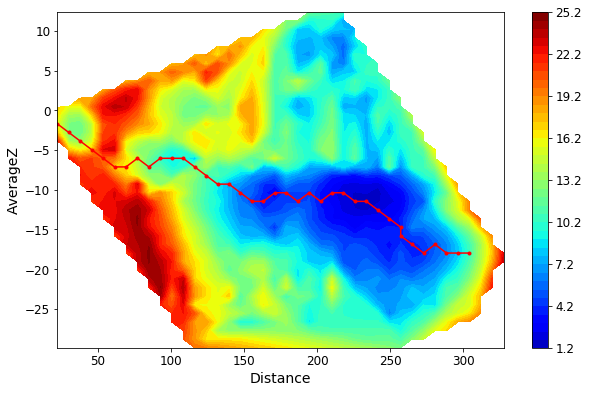

In [213]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

## zoom to 120 - 300

(120, 300)

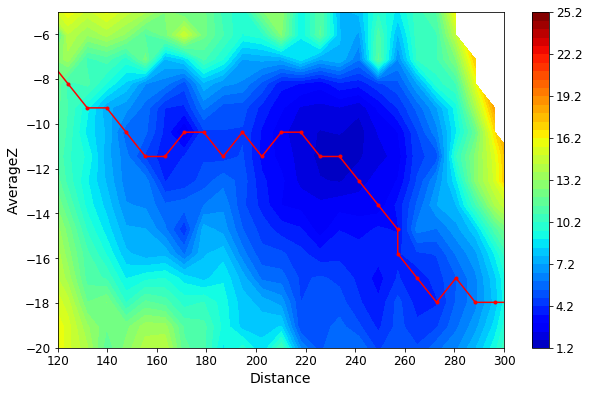

In [6]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(-20, -5)
plt.xlim(120, 300)

In [26]:
t_pos = data.query("TempT == 373 and DisReal > 220 and DisReal < 250 and z_average > -14 and z_average < -10").reset_index(drop=True)
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.drop_duplicates(["Step", "Temp", "BiasTo"]).to_csv("/Users/weilu/Research/data/aug21/low_e_jun01_h12.csv")

In [ ]:
# zoom z -3, dis 240 

(220, 250)

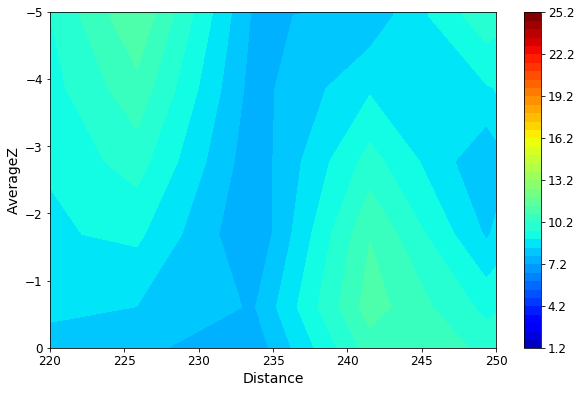

In [17]:
pre = "/Users/weilu/Research/server/may_2018/03_week"
temp = 370
location = pre + "/second_start_extended_combined_2/_280-350/2d_zAverage_dis/higer_force_0.2/"
location2 = location + f"perturbation-2-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin = shortest_path_2(location2, title="high_force_AverageZ_Dis", start=(11, 36), end=(26,0),save=False, plot1d=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)
plt.ylim(0, -5)
plt.xlim(220, 250)

In [27]:
t_pos = data.query("TempT == 373 and DisReal > 220 and DisReal < 250 and z_average > -5 and z_average < 0").reset_index(drop=True)
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.drop_duplicates(["Step", "Temp", "BiasTo"]).to_csv("/Users/weilu/Research/data/aug21/low_e_jun23.csv")

In [22]:
chosen

,level_0,AMH,AMH-Go,AMH_3H,AMH_4H,BiasTo,DisReal,Dis_h56,Distance,Energy,...,z_average,z_h1,z_h2,z_h3,z_h4,z_h5,z_h6,BiasedEnergy,BiasEnergy,Energy_with_all_bias
2,82690,NaN,-358.690584,NaN,-269.950237,226.0,228.080296,60.881548,-207.103784,-629.245592,...,-0.501580,-16.599387,9.431345,22.775684,23.027055,-1.901645,-26.003455,-443.678257,0.086553,-443.591704
5,82690,NaN,-358.690584,NaN,-269.950237,226.0,228.080296,60.881548,-207.103784,-629.245592,...,-0.501580,-16.599387,9.431345,22.775684,23.027055,-1.901645,-26.003455,-443.678257,0.086553,-443.591704
1,82678,NaN,-358.722565,NaN,-279.764687,226.0,225.462078,66.521893,-199.950740,-635.897974,...,-0.426415,-20.133379,11.798070,23.633232,23.358520,-2.560193,-24.700998,-437.024865,0.005787,-437.019078
4,82678,NaN,-358.722565,NaN,-279.764687,226.0,225.462078,66.521893,-199.950740,-635.897974,...,-0.426415,-20.133379,11.798070,23.633232,23.358520,-2.560193,-24.700998,-437.024865,0.005787,-437.019078
0,82486,NaN,-352.076820,NaN,-267.441646,226.0,229.430360,57.607434,-227.688271,-673.253001,...,-0.544515,-19.923898,6.243507,30.286311,19.081878,0.122172,-22.604769,-432.999507,0.235347,-432.764159
3,82486,NaN,-352.076820,NaN,-267.441646,226.0,229.430360,57.607434,-227.688271,-673.253001,...,-0.544515,-19.923898,6.243507,30.286311,19.081878,0.122172,-22.604769,-432.999507,0.235347,-432.764159


In [35]:
chosen["DisReal"]

87     228.080296
33     228.080296
74     220.901109
20     220.901109
92     220.055694
38     220.055694
68     233.440151
14     233.440151
86     225.462078
32     225.462078
99     227.547341
45     227.547341
53     223.464318
107    223.464318
61     222.563058
7      222.563058
60     223.597065
6      223.597065
96     224.409356
42     224.409356
Name: DisReal, dtype: float64

# complete out

In [28]:
t_pos = data.query("TempT == 373 and DisReal > 260 and z_average < -16").reset_index(drop=True)
chosen = t_pos.sort_values("Energy_with_all_bias").head(n=20)
chosen.drop_duplicates(["Step", "Temp", "BiasTo"]).to_csv("/Users/weilu/Research/data/aug21/low_e_jun01_out.csv")